<a href="https://colab.research.google.com/github/umeshrawat/MachineLearning/blob/master/Unsupervised_Classification/SocialClusters/src/SocialClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Open the code repo

!git clone https://github.com/umeshrawat/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 326, done.
remote: Counting objects: 100% (326/326), done.
remote: Compressing objects: 100% (312/312), done.
remote: Total 326 (delta 51), reused 232 (delta 9), pack-reused 0
Receiving objects: 100% (326/326), 13.85 MiB | 5.41 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [2]:
root_folder_path = '/content/MachineLearning/Unsupervised_Classification/SocialClusters/Dataset/facebook_combined.txt'

In [4]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.4 MB/s eta 0:00:00


In [5]:
import networkx as nx
from igraph import Graph

nx_graph = nx.read_edgelist(root_folder_path, create_using = nx.Graph(), nodetype = int)


igraph_fb = Graph.Read_Edgelist(root_folder_path, directed=False)


In [9]:
print(nx_graph)
# Calculate degree centrality
degree_centrality = nx.degree_centrality(nx_graph)
print(degree_centrality)

Graph with 4039 nodes and 88234 edges
{0: 0.08593363051015354, 1: 0.004210004952947003, 2: 0.0024764735017335313, 3: 0.004210004952947003, 4: 0.0024764735017335313, 5: 0.0032194155522535907, 6: 0.0014858841010401188, 7: 0.004952947003467063, 8: 0.001981178801386825, 9: 0.014115898959881128, 10: 0.0024764735017335313, 11: 0.00024764735017335313, 12: 0.00024764735017335313, 13: 0.007677067855373947, 14: 0.003714710252600297, 15: 0.00024764735017335313, 16: 0.002228826151560178, 17: 0.0032194155522535907, 18: 0.00024764735017335313, 19: 0.00396235760277365, 20: 0.003714710252600297, 21: 0.016097077761267953, 22: 0.0027241208519068845, 23: 0.004210004952947003, 24: 0.00396235760277365, 25: 0.017087667161961365, 26: 0.016840019811788013, 27: 0.0012382367508667657, 28: 0.0032194155522535907, 29: 0.0032194155522535907, 30: 0.004210004952947003, 31: 0.005695889053987122, 32: 0.0014858841010401188, 33: 0.0004952947003467063, 34: 0.0012382367508667657, 35: 0.0004952947003467063, 36: 0.0027241208

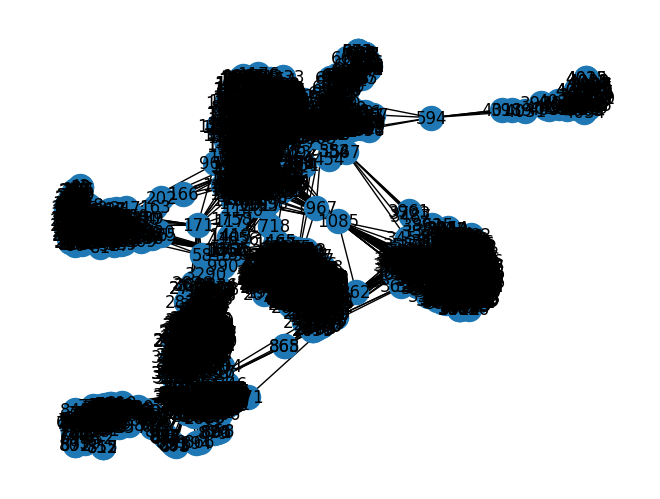

In [10]:
import matplotlib.pyplot as plt
nx.draw(nx_graph, with_labels=True)
plt.show()